# Fundus images dataset  

### Description

Fundus imaging allows for the visualization of the interior surface of the eye, known as the fundus; and used to examine structures such as the optic disc, retina, and retinal microvasculature. This procedure is commonly used to diagnose and monitor a variety of eye diseases.

### Introduction

Fundus imaging is a type of medical imaging technique that is used to obtain detailed, high-resolution images of the back of the eye, including the retina, the optic nerve, and the macula, an oval-shaped area in the center of the retina used for central vision (Figure 1). These images can provide important information about the health of the eye and can be used to diagnose and monitor a variety of eye diseases and conditions.

One of the key features that can be seen in fundus images is the retinal microvasculature, which refers to the network of small blood vessels that supply blood to the retina. The appearance and structure of the retinal microvasculature can provide information about the health of the eye and can be used to diagnose and monitor a variety of conditions.

In addition, the information provided by fundus imaging can also be used in research to better understand the underlying mechanisms of various eye conditions and as a non-invasive tool for visualization of the general microvascular circulation health and a direct view to part of the central nervous system. As such, the fundus image can serve as a window to systemic health. 

The Human Phenotype Project (HPP) performs fundus imaging on each participant's eyes to produce image and DICOM files. To process and enhance the data, an open source software pipeline: [AutoMorph: Automated Retinal Vascular Morphology Quantification via a Deep Learning Pipeline (Zhou 2022)](https://tvst.arvojournals.org/article.aspx?articleid=2783477), that combines several different deep learning models is used. Specifically for the following steps:
(1) Image pre-processing.
(2) Image quality grading.
(3) Anatomical segmentation (binary vessel segmentation, artery/vein segmentation, and optic disc segmentation).
(4) Various morphological feature measurements such as vessel caliber, tortuosity density, fractal dimension etc. These features were calculated separately for segmented veins and arteries, and also as a combined feature.
The current pipeline does not include automatic identification or clinical interpretation of eye abnormalities such as age-macular degeneration (AMD) or edema, glaucoma signs, microaneurysms etc’ that can be derived from the fundus image.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Images of both eyes were taken with the iCare DRSplus confocal fundus imaging system (ICare). Center view 45° retinal images were collected without pupil dilation.  

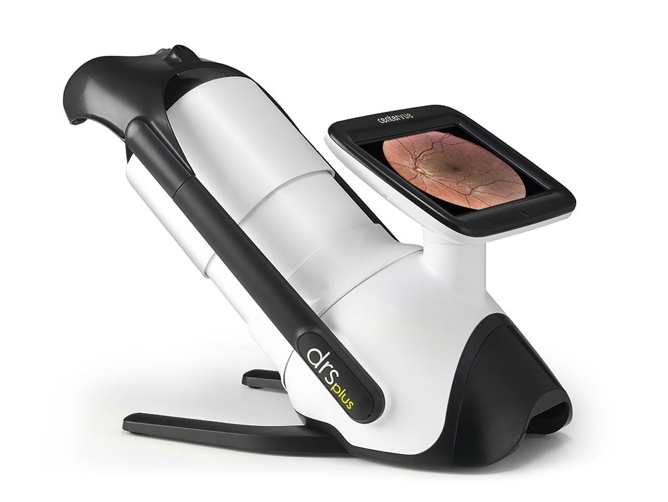

### Data availability 
<!-- for the example notebooks -->
- All tabular information is stored in a main parquet file: `fundus.parquet`
- Derived microvasculature information is stored in a secondary parquet file: `microvasculature.parquet`
- Image files including segmentations are stored in subfolders and mapped in the parqet files.

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/003-fundus.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/3)

In [2]:
%load_ext autoreload
%autoreload 2

from pheno_utils import PhenoLoader


In [4]:
pl = PhenoLoader('fundus', base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for fundus with
76 fields
3 tables: ['fundus', 'microvasculature', 'age_sex']

# Data dictionary

In [5]:
pl.dict.head()

,field_string,description_string,customer_field,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,...,sexed,debut,completed,browser_image_label,browser_image_caption,browser_image_fname,index,nullable,coerce,required
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
fundus_raw_image_left,Fundus raw image (left),Fundus raw image (left),not_ready,3,raw_images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus image (left),NaN,fundus_sample_image_raw_left.png,False,False,False,True
fundus_raw_image_right,Fundus raw image (right),Fundus raw image (right),not_ready,3,raw_images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus image (right),NaN,fundus_sample_image_raw_right.png,False,False,False,True
fundus_image_left,Fundus image (left),Fundus image (left),ready,3,images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus image (left),NaN,fundus_sample_image_raw_left.png,False,False,False,True
fundus_image_right,Fundus image (right),Fundus image (right),ready,3,images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus image (right),NaN,fundus_sample_image_raw_right.png,False,False,False,True
fundus_dicom_left,Fundus DICOM (left),Fundus DICOM (left),not_ready,3,dicom,Dicom file (individual),Primary,NaN,Single,string,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Show all fields
pl[pl.fields].head(3)

,,,,artery_average_width_left,artery_average_width_right,artery_distance_tortuosity_left,artery_distance_tortuosity_right,artery_fractal_dimension_left,artery_fractal_dimension_right,artery_squared_curvature_tortuosity_left,artery_squared_curvature_tortuosity_right,artery_tortuosity_density_left,artery_tortuosity_density_right,...,vein_squared_curvature_tortuosity_left,vein_squared_curvature_tortuosity_right,vein_tortuosity_density_left,vein_tortuosity_density_right,vein_vessel_density_left,vein_vessel_density_right,vessel_density_left,vessel_density_right,age,sex
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,,,,,,,,,
5516424321,10k,00_00_visit,0,16704.845072,19275.285156,2.210250,3.206585,1.332220,1.351047,17.569267,32.524895,0.689869,0.704674,...,3.468493,2.670838,0.681061,0.729184,0.053130,0.048413,0.088169,0.082611,54.447672,Female
5027574288,10k,00_00_visit,0,15274.123290,16420.669426,2.112180,3.159730,1.379783,1.374609,3.999606,15.024836,0.670067,0.644393,...,11.250503,11.508942,0.706070,0.756001,0.048644,0.049089,0.084244,0.075644,54.169913,Male
7783260382,10k,00_00_visit,0,17456.451465,19328.486729,2.847594,5.667071,1.277419,1.312046,29.497951,66.675197,0.756853,0.793134,...,17.811276,14.097184,0.741074,0.714846,0.038706,0.042760,0.071681,0.074734,45.892093,Male


In [7]:
pl.dfs['fundus'].head()

,,,,fundus_image_left,fundus_image_right,collection_date,timezone,collection_timestamp,device_software_version,image_view_type_left,image_view_type_right,preprocessing_centre_width_left,preprocessing_centre_height_left,...,fundus_image_quality_sd_usable_left,fundus_image_quality_sd_bad_left,fundus_image_binary_artery_segmentation_left,fundus_image_binary_artery_segmentation_right,fundus_image_binary_vein_segmentation_left,fundus_image_binary_vein_segmentation_right,fundus_image_binary_artery_and_vein_classification_left,fundus_image_binary_artery_and_vein_classification_right,fundus_image_binary_vessel_segmentation_left,fundus_image_binary_vessel_segmentation_right
participant_id,cohort,research_stage,array_index,,,,,,,,,,,,,,,,,,,,,
5516424321,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...,s3://pheno-synthetic-data/data/fundus/10k/imag...,2022-09-02 00:24:25.249018112,asia/jerusalem,2022-07-24 02:27:34.526707968,2.0.0,central,central,1458,1800,...,0.028421,0.039839,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
5027574288,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...,s3://pheno-synthetic-data/data/fundus/10k/imag...,2022-09-05 22:27:22.026214400,asia/jerusalem,2022-09-01 03:23:20.304426752,2.0.0,central,central,1457,1800,...,0.011860,0.000009,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
7783260382,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...,s3://pheno-synthetic-data/data/fundus/10k/imag...,2022-02-12 18:35:25.047434240,asia/jerusalem,2021-10-20 09:13:24.203906816,2.0.0,central,central,1458,1800,...,0.002624,0.001440,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
1178277844,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...,s3://pheno-synthetic-data/data/fundus/10k/imag...,2022-06-23 12:19:21.937116928,asia/jerusalem,2022-06-28 15:31:19.938976256,2.0.0,central,central,1457,1801,...,0.030613,0.014747,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
1622660825,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...,s3://pheno-synthetic-data/data/fundus/10k/imag...,2022-06-16 04:46:46.675889664,asia/jerusalem,2022-05-12 23:06:58.671820800,2.0.0,central,central,1458,1800,...,0.021224,0.002713,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synth

A list of all available image fields:

In [8]:
pl.dict[pl.dict['field_type'].str.contains('Image file')].head()

,field_string,description_string,customer_field,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,...,sexed,debut,completed,browser_image_label,browser_image_caption,browser_image_fname,index,nullable,coerce,required
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
fundus_raw_image_left,Fundus raw image (left),Fundus raw image (left),not_ready,3,raw_images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus image (left),NaN,fundus_sample_image_raw_left.png,False,False,False,True
fundus_raw_image_right,Fundus raw image (right),Fundus raw image (right),not_ready,3,raw_images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus image (right),NaN,fundus_sample_image_raw_right.png,False,False,False,True
fundus_image_left,Fundus image (left),Fundus image (left),ready,3,images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus image (left),NaN,fundus_sample_image_raw_left.png,False,False,False,True
fundus_image_right,Fundus image (right),Fundus image (right),ready,3,images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus image (right),NaN,fundus_sample_image_raw_right.png,False,False,False,True
fundus_image_binary_artery_segmentation_left,Fundus image binary artery segmentation (left),Fundus image binary artery segmentation (left),ready,3,segmented_images,Image file (individual),Primary,NaN,Single,string,...,Both sexes,2021-02-17,NaN,Fundus Image Binary Artery Segmentation (left),NaN,fundus_image_binary_artery_segmentation_left.png,False,True,False,True


# Get a summary of some specific fields

In [9]:
pl.describe_field(["collection_date", "vein_vessel_density_right", "fundus_image_right"])

,collection_date,vein_vessel_density_right,fundus_image_right
field_string,Collection date (YYYY-MM-DD),Vein vessel density (right),Fundus image (right)
description_string,Collection date (YYYY-MM-DD),Vein vessel density (right),Fundus image (right)
customer_field,ready,ready,ready
folder_id,3,3,3
feature_set,fundus,microvasculature,images
field_type,Date,Continuous,Image file (individual)
strata,Collection time,Primary,Primary
data_coding,NaN,NaN,NaN
array,Single,Single,Single
pandas_dtype,datetime64[ns],float,string


# Load and show fundus images

[None]

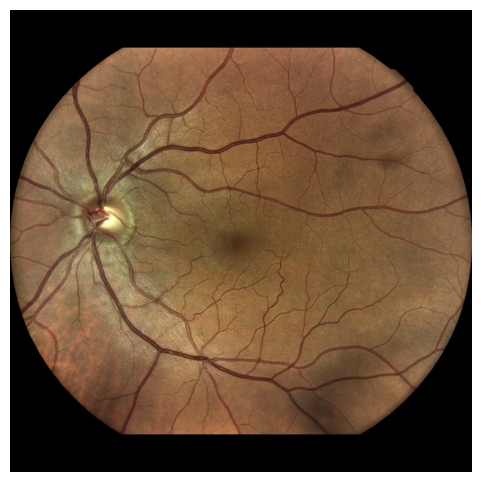

In [22]:
pl.load_bulk_data('fundus_image_left')

In [12]:
# You can check the fundus image path by using the following command
pl['fundus_image_left'].head()

,,,,fundus_image_left
participant_id,cohort,research_stage,array_index,
5516424321,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...
5027574288,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...
7783260382,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...
1178277844,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...
1622660825,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/imag...


# Load and show a binary segmentation image

In [13]:
# get all segmentation columns using flexible field search
pl.get('segmentation', flexible=True) 

,,,,fundus_image_binary_artery_segmentation_left,fundus_image_binary_artery_segmentation_right,fundus_image_binary_vein_segmentation_left,fundus_image_binary_vein_segmentation_right,fundus_image_binary_vessel_segmentation_left,fundus_image_binary_vessel_segmentation_right
participant_id,cohort,research_stage,array_index,,,,,,
5516424321,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
5027574288,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
7783260382,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
1178277844,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
1622660825,10k,00_00_visit,0,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
...,...,...,...,...,...,...,...,...,...
9642255339,10k,02_01_visit,0,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
9668685572,10k,02_01_visit,0,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...
9704705313,10k,02_01_visit,0,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...,s3://pheno-synthetic-data/data/fundus/10k/segm...


[None]

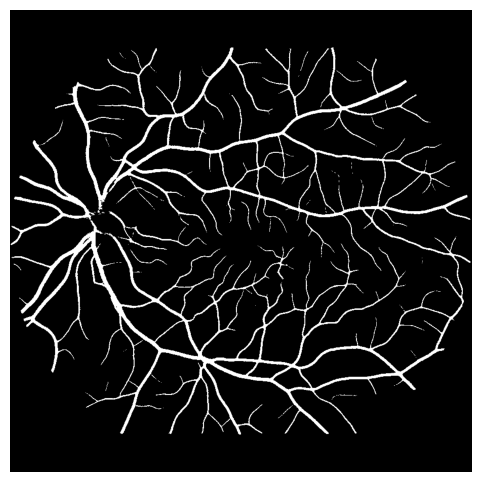

In [14]:
pl.load_bulk_data('fundus_image_binary_vessel_segmentation_left')

# Plot histogram and ecdf for vessel_density_left at baseline visit


In [15]:
from pheno_utils.basic_plots import hist_ecdf_plots

In [16]:
# filter out baseline visit
col = 'vessel_density_left'

df = pl[[col, 'age', 'sex', 'collection_date']].loc[:,:,"00_00_visit",:,:]

df.head()

,,,vessel_density_left,age,sex,collection_date
participant_id,cohort,array_index,,,,
5516424321,10k,0,0.088169,54.447672,Female,2022-09-02 00:24:25.249018112
5027574288,10k,0,0.084244,54.169913,Male,2022-09-05 22:27:22.026214400
7783260382,10k,0,0.071681,45.892093,Male,2022-02-12 18:35:25.047434240
1178277844,10k,0,0.078115,44.435100,Female,2022-06-23 12:19:21.937116928
1622660825,10k,0,0.093079,44.621536,Male,2022-06-16 04:46:46.675889664


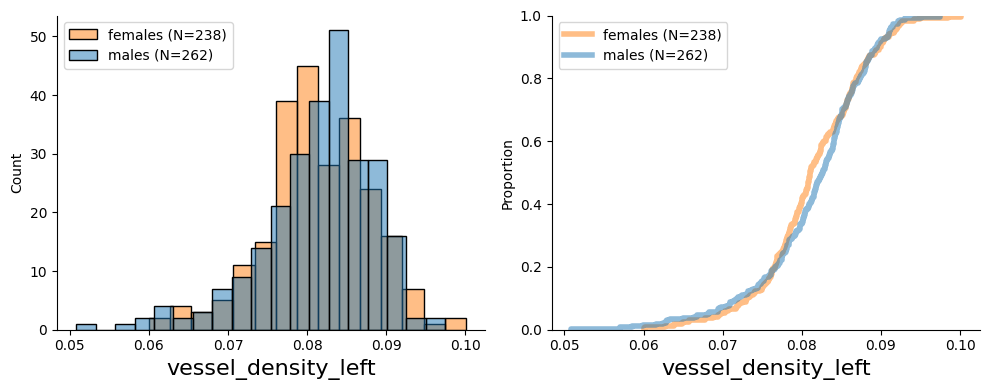

,count,mean,std,min,25%,50%,75%,max
vessel_density_left,500.0,0.081407,0.006928,0.050836,0.077697,0.081856,0.086114,0.100053


In [17]:
# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)

# Age / sex reference plots

In [18]:
from pheno_utils.age_reference_plots import GenderAgeRefPlot

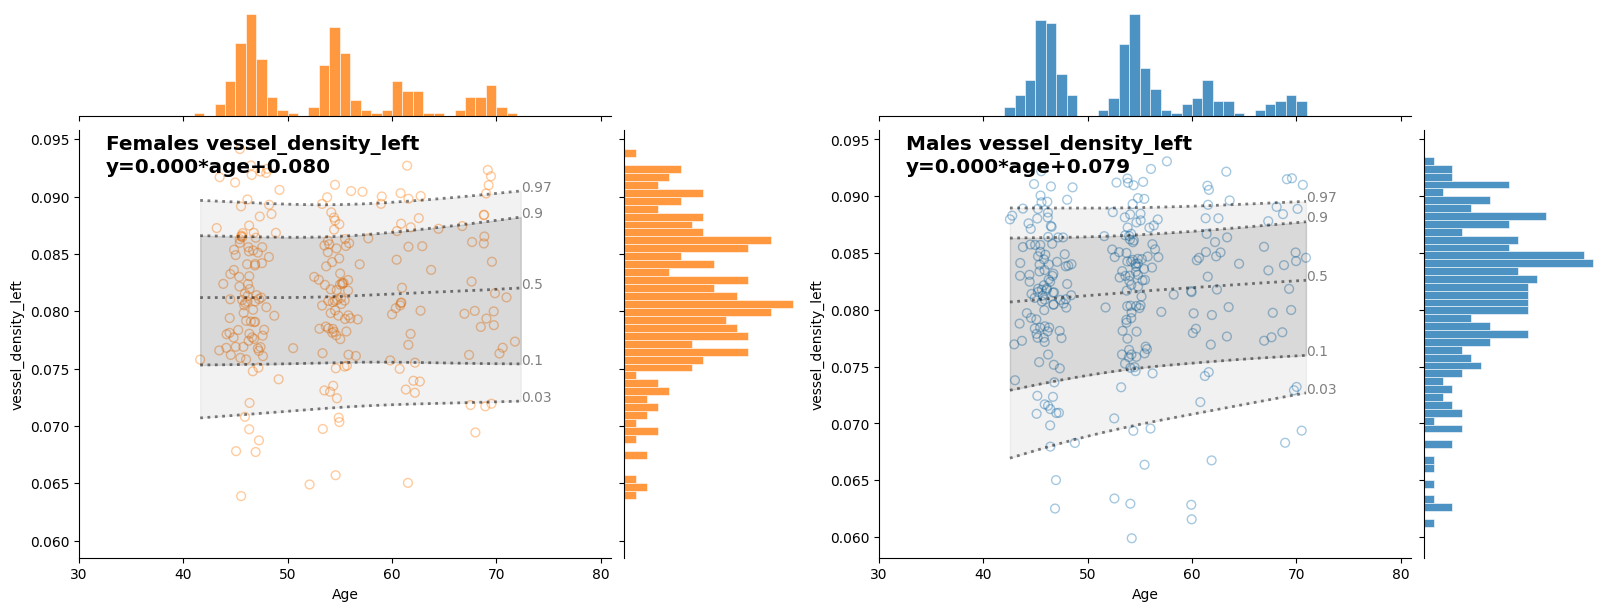

In [19]:
gender_refplots = GenderAgeRefPlot(df.dropna(subset=[col,"sex", "age"]), "vessel_density_left", age_col="age")
gender_refplots.plot()